In [2]:
import pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
word_level_comms = []
# for l in load_obj("main_cores"):
#     print(l)

for comm in load_obj("main_cores"):
    total = []
    for c in comm:
        total.extend(c.split(","))
    word_level_comms.append(total)
print(len(word_level_comms))

44


In [4]:
time_sweep = 5
path_to_raw = "../GDELT_actant_corr/ExtractedGDELTData/"
ordered_list = []
for root, dirs, files in os.walk(path_to_raw):
   for dirname in sorted(dirs):
        ordered_list.append(path_to_raw + dirname + "/into_relex.txt")

In [5]:
inspect_paths = []
for i in range(len(ordered_list) - time_sweep + 1):
    inspect_paths.append(ordered_list[i:i+time_sweep])

In [6]:
def extract_text(link):
    with open(link, 'r') as file:
        data = file.read().replace('\n', '')
    return data

total_corpi = []
for set_of_raw in inspect_paths:
    corpus = []
    for link in set_of_raw:
        corpus.extend(extract_text(link).lower().split())
    total_corpi.append(corpus)

In [21]:
import pandas as pd
def find_graph(corpus, comm):
    tot_sum = 0
    for word in comm:
        for c in corpus:
            if c == word:
                tot_sum += 1
    return tot_sum / (len(comm)*len(corpus))

traj = []


def random_sample_NER(count = 100, file_ = "../GDELT_actant_corr/NER_list.csv"):
    df = pd.read_csv(file_)
    final_list = []
    list_of_random = df.sample(count)['entity']
    for l in list_of_random:
        final_list.append(l)
    return final_list

#for comm in word_level_comms:
communities = [["5g","waves","antenna","radio","towers","radiation"],["army","us","bioweapon"],["lab","science","wuhan"],["jews"], ["bill","gates","vaccine","funds","foundation","quantum"],["qanon","q"]]



for comm in communities:
    total_data = []
    for corpus in total_corpi:
        data = find_graph(corpus, comm)
        total_data.append(data)
    traj.append(total_data)

In [8]:
from datetime import datetime, timedelta
def to_date(DATE):
    return datetime.strptime(DATE, '%Y%m%d%H%M%S')

def from_date(DATE):
    return DATE.strftime("%Y%m%d%H%M%S")

def create_range(DATE):
    list_dates = []
    for i in range(106 - time_sweep):
        list_dates.append((DATE + timedelta(days = i)).date())
    return list_dates

def create_range_2(DATE):
    list_dates = []
    for i in range(105):
        list_dates.append((DATE + timedelta(days = i)).date())
    return list_dates

In [9]:
# Community Trends in the News Report
# Cross Correlation in Time and find the delay parameter?
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

date = to_date("20200101000001")
l_d = create_range(date)
l_d2 = create_range_2(date)

chan4 = pd.read_csv("all.csv")
dates = []
texts = []

dictionary_of_text = defaultdict(list)
for row in chan4.iterrows():
    try:
        dictionary_of_text[datetime.fromtimestamp(row[1]["date_utc"]).date()].append(str(row[1]["text"]))
    except:
        continue

traj_soc = []
for comm in communities:
    total_data = []
    for k,l in enumerate(l_d2[:-time_sweep+1]):
    #for k,l in enumerate(l_d2):
        corpus = []

        for j in range(k, k + time_sweep):
            corp = (" ".join(dictionary_of_text[l_d2[j]])).lower().split(" ")
            corpus.extend(corp)
 
        if corpus == []:
            data = 0
        else:
            data = find_graph(corpus, comm)
        total_data.append(data)
    traj_soc.append(total_data)

index = -1

for l in [index]: 
    plt.plot(l_d[87:], traj[l][87:], label ="News Reports")
    plt.plot(l_d[87:], traj_soc[l][87:], label="Sampled 4Chan Threads")

#plt.legend()


plt.xticks(rotation=45)


plt.title("Normalized Word-Match Score - Community: " + str(communities[index]))
plt.xlabel("Date Line")
plt.ylabel("Fraction of Words")

Text(0, 0.5, 'Fraction of Words')

Text(0.5, 1.0, 'Cross-Correlation of Relative Coverage Scores between News and Social Media')

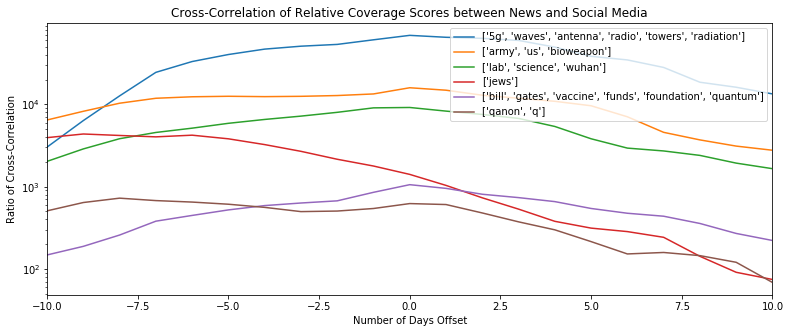

In [44]:
import numpy as np
plt.figure(figsize=(13,5))


num = 1
for l in range(len(communities) - 1):
    news = np.divide(np.array(traj[l][87:]),np.array(traj[-1][87:]))
    chan4 = np.divide(np.array(traj_soc[l][87:]),np.array(traj_soc[-1][87:]))

    arr = np.correlate(news, chan4, "full")
    plt.plot(range(-10,11),arr[3:-3], label=str(communities[l]))
    #plt.fill_between(range(-13,14), arr, alpha=0.5)


plt.xlim(-10,10)
plt.yscale("log")
plt.legend(fontsize=10,loc="upper right")
plt.xlabel("Number of Days Offset")
plt.ylabel("Ratio of Cross-Correlation")
plt.title("Cross-Correlation of Relative Coverage Scores between News and Social Media")


2020-03-28 87
2020-04-14
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 591, 1213, 426, 421, 14524, 7668, 6605, 14526, 9893, 30800, 44269, 21292, 41545, 17272, 4679, 8370, 35934]


Text(0, 0.5, 'Number of Words')

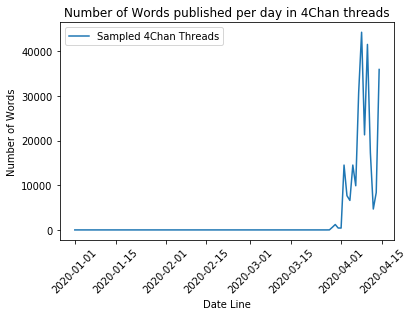

In [18]:
activity = []
for j, lp in enumerate(l_d2):
    corp = (" ".join(dictionary_of_text[lp])).lower().split(" ")
    activity.append(len(corp))

plt.plot(l_d2, activity, label="Sampled 4Chan Threads")
for k,l in enumerate(activity):
    if l!=1:
        print(l_d2[k],k)
        break
print(l_d2[-1])
print(activity)
plt.legend()
plt.xticks(rotation=45)
plt.title("Number of Words published per day in 4Chan threads")
plt.xlabel("Date Line")
plt.ylabel("Number of Words")

In [19]:
# Conditional occurence of actants
import re
#list_of_actants = ["qanon","donald trump", "conspiracy theory", "5g", "waves"]
path = "../GDELT_actant_corr/Results0423/communities.txt"
a = b = c = 0

actant1 = "qanon"
actant2 = "donald trump"

with open(path) as f:
    list_lines = f.readlines()
    for l in list_lines:
        match  = re.findall(r'{(.+?)}', l)
        for m in match:
            words = m.split(", ")
            for word in words:
                if "qanon" in words and "donald trump" in words:
                    a += 1
                elif "qanon" in words:
                    b += 1
                elif "donald trump" in words:
                    c += 1

print("Probability of Communal Sharing: " + actant1 + " | " + actant2, a / b)
print("Probability of Communal Sharing: " + actant2 + " | " + actant1, a / c)

Probability of Communal Sharing: qanon | donald trump 0.38333333333333336
Probability of Communal Sharing: donald trump | qanon 0.10087719298245613


Text(0, 0.5, 'Number of Common Neighbors')

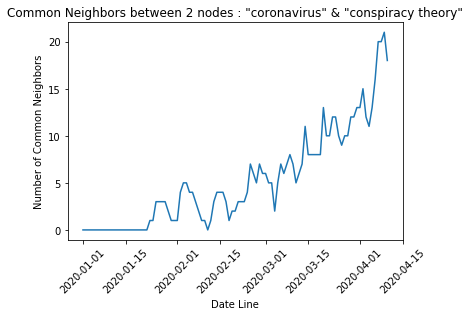

In [20]:
# Number of Distinct simple paths between two nodes (coronavirus, conspiracy theory)
path = "../GDELT_actant_corr/Results0424/simple_path.txt"
with open(path) as f:
    g = f.readlines()
    simple_paths = [int(gi) for gi in g]

plt.plot(l_d, simple_paths)
plt.title("Common Neighbors between 2 nodes : \"coronavirus\" & \"conspiracy theory\"")
plt.xticks(rotation=45)
plt.xlabel("Date Line")
plt.ylabel("Number of Common Neighbors")

In [45]:
bill_gates = pd.read_csv("../GDELT_actant_corr/Results0424/bill_gates.csv")
for row in bill_gates.iterrows():
    e = row[1]

Here


Text(0.5, 1.0, 'Cross-Correlation of Relative Coverage Scores between News and Social Media')

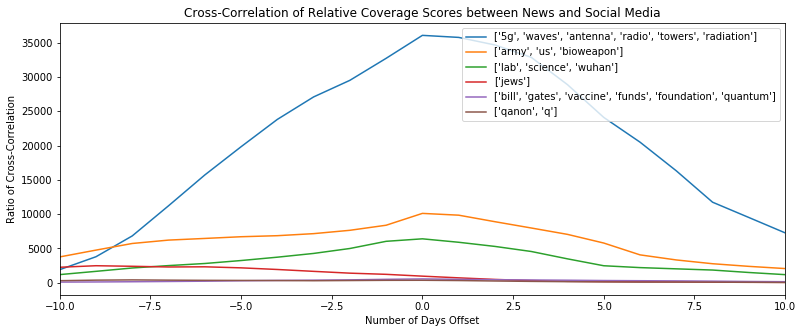

In [19]:
import numpy as np
from copy import deepcopy

plt.figure(figsize=(13,5))

def ret_trajs(communities):
    traj_soc = []
    for comm in communities:
        total_data = []
        for k,l in enumerate(l_d2[:-time_sweep+1]):
        #for k,l in enumerate(l_d2):
            corpus = []

            for j in range(k, k + time_sweep):
                corp = (" ".join(dictionary_of_text[l_d2[j]])).lower().split(" ")
                corpus.extend(corp)
    
            if corpus == []:
                data = 0
            else:
                data = find_graph(corpus, comm)
            total_data.append(data)
        traj_soc.append(total_data)
    
        total_data = []
        for corpus in total_corpi:
            data = find_graph(corpus, comm)
            total_data.append(data)
        traj.append(total_data)

    return traj, traj_soc

communities = [["5g","waves","antenna","radio","towers","radiation"],["army","us","bioweapon"],["lab","science","wuhan"],["jews"], ["bill","gates","vaccine","funds","foundation","quantum"],["qanon","q"]]

suml = np.zeros((len(communities),27))
sum2l = np.zeros((len(communities),27))

t = 0
while (t < 10):
    comm = deepcopy(communities)
    comm.append(random_sample_NER(500))
    traj, traj_soc = ret_trajs(comm)
    print("Here")
    for l in range(len(comm) - 1):
        news = np.divide(np.array(traj[l][87:]),np.array(traj[-1][87:]))
        chan4 = np.divide(np.array(traj_soc[l][87:]),np.array(traj_soc[-1][87:]))
        arr = np.correlate(news, chan4, "full")
        suml[l][:] += arr
        sum2l[l][:] += np.multiply(arr, arr)
    t += 1

for i in range(len(communities)):
        mean = suml[i][3:-3]/t
        std = np.sqrt((sum2l[i][3:-3] - np.multiply(mean,mean)/t) / t)
        plt.plot(range(-10,11),mean, label=str(communities[i]))
        plt.fill_between(range(-10,11), mean-std,mean+std, alpha=0.5)

plt.xlim(-10,10)
#plt.yscale("log")
plt.legend(fontsize=10,loc="upper right")
plt.xlabel("Number of Days Offset")
plt.ylabel("Ratio of Cross-Correlation")
plt.title("Cross-Correlation of Relative Coverage Scores between News and Social Media")


[ 2569.65397127  5063.48929363  9217.74156995 15737.60686375
 21009.61570442 26819.15280831 32756.36799037 37821.35344101
 42219.87591892 47857.20270022 52891.88625481 51155.92857715
 50534.18246135 48176.61308536 42485.85748353 36254.15230001
 32475.84814985 26370.67474564 18019.88458121 13890.81363267
  9645.607042  ] 5
[ 2672.1593561   5298.98869209  9701.20172938 16697.56930315
 21693.69923128 27095.32255739 32745.39146923 37524.31601172
 41778.56107319 47568.50356163 52626.61547436 50456.94517052
 49789.05251976 47372.69706527 41669.02761638 35580.31308782
 31862.17008534 25973.09596004 17825.49442133 13893.41825626
  9795.71032081]
[ 5329.37864042  6623.59123006  8001.74114572  8852.55261942
  9219.82502354  9710.58433083 10034.34095721 10617.06683863
 11401.74230128 12314.2202764  15944.12917982 15379.49928038
 13966.45389006 11825.74686439 10716.89768174  8869.5530376
  6060.83811522  4946.49448061  4429.89141787  3891.1327768
  3377.52008188] 5
[ 5603.2100524   6939.8485805   

Text(0.5, 1.0, 'Cross-Correlation of Relative Coverage Scores between News and Social Media')

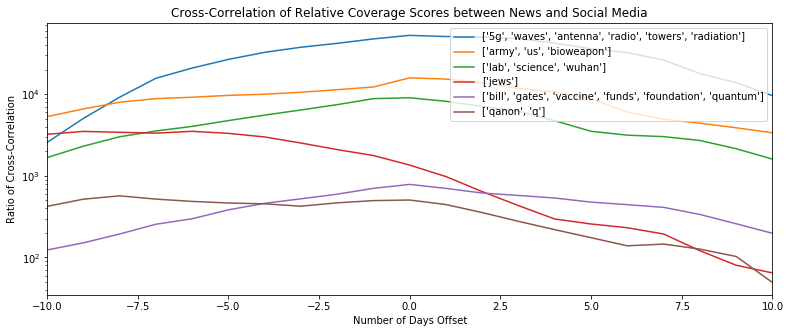

In [16]:
plt.figure(figsize=(13,5))
for i in range(len(communities)):
        mean = suml[i][3:-3]/t
        print(mean,t)
        std = np.sqrt((sum2l[i][3:-3] - np.multiply(mean,mean)/t) / t)
        print(std)
        plt.plot(range(-10,11),mean, label=str(communities[i]))
        #plt.fill_between(range(-10,11), mean - std,mean+std, alpha=0.5)

plt.xlim(-10,10)
plt.yscale("log")
plt.legend(fontsize=10,loc="upper right")
plt.xlabel("Number of Days Offset")
plt.ylabel("Ratio of Cross-Correlation")
plt.title("Cross-Correlation of Relative Coverage Scores between News and Social Media")